In [1]:
## import stmts;

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
s = "\nDone(*_*)"
print(s)


Done(*_*)


In [2]:
## Loading the dataset 
data = input_data.read_data_sets("data/MNIST/",one_hot=True)
print(s)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz

Done(*_*)


In [3]:
## Converting one-hot encoded labels to numeric value 
data.train.cls = np.array([label.argmax() for label in data.train.labels])
data.test.cls = np.array([label.argmax() for label in data.test.labels])

print(s)


Done(*_*)


In [4]:
## Data dimensions
img_size = 28
img_size_flat = img_size*img_size
img_shape = (img_size,img_size)
n_classes = 10

print(s)


Done(*_*)


In [5]:
print(type(data.train.labels[0]))

print(s)

<class 'numpy.ndarray'>

Done(*_*)


In [36]:
a = np.array([1,2,3,4,5])
ea = np.exp(a)
p = ea/np.sum(ea)
print(p)
print(np.sum(p))

[ 0.01165623  0.03168492  0.08612854  0.23412166  0.63640865]
1.0


In [6]:
## Helper function to plot the images, in total 9 images in 3X3 grid
def plot_images(images,cls_true,cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig,axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=.5,wspace=0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape),cmap='binary')
        
        if cls_pred is None:
            xlabels = "True: {0}".format(cls_true[i])
        else:
            xlabels = "True: {0}, False: {1}".format(cls_true[i],cls_pred[i])
        ax.set_xlabel(xlabels)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

print(s)


Done(*_*)


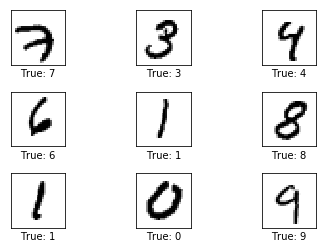


Done(*_*)


In [7]:
## Ploting the 9 images from training samples
plot_images(data.train.images[0:9],data.train.cls[0:9])
print(s)

In [8]:
## Defining Placeholder
x = tf.placeholder(tf.float32,[None,img_size_flat])
y_true = tf.placeholder(tf.float32,[None,n_classes])
y_true_cls = tf.placeholder(tf.int64,[None])

print(s)


Done(*_*)


In [9]:
## Defining the Model variable - these are the variable need to be optimized for model to perform
## better
## basically these are weights and biases between different layer

weights = tf.Variable(tf.zeros([img_size_flat,n_classes]))
biases = tf.Variable(tf.zeros([n_classes]))

print(s)


Done(*_*)


In [10]:
## Model - Simple Linear Model

"""
# logits is the output of our model, we need to modify this.
# shape of logits is (n_images,n_classes).
# shape of bises is (n_classes,).
# biases is added to each rows of result obtained after multiplying x and weights.

"""
logits = tf.matmul(x, weights) + biases

print(s)


Done(*_*)


In [11]:
## Converting the logits to probabilities of classes

"""
# shape of y_pred is same as logits
# softmax convert each row of logits to normalised vector i.e. value in each row will be between 0-1, 
  sum of all values in row will be 1
"""
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred,dimension=1)

print(s)


Done(*_*)


In [12]:
## Cost function to be optimized

"""
# Cross Entropy is used as loss function.
# we need to minimisze this loss function.

"""
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)

print(s)


Done(*_*)


In [13]:
## Optimization method - Gradient Descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

print(s)


Done(*_*)


In [14]:
## Performance measure
correct_prediction = tf.equal(y_pred_cls,y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

print(s)


Done(*_*)


In [15]:
## Tensorflow Run

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(s)


Done(*_*)


In [16]:
## Definig Batch size
batch_size = 100

print(s)


Done(*_*)


In [17]:
## Defining optimizer function

def optimize(num_iterations):
    for i in range(num_iterations):
        ## TODO -: iterate for all batch as well 
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_batch = {x:x_batch ,y_true:y_true_batch}
        
        sess.run(optimizer,feed_dict=feed_dict_batch)
        
print(s)


Done(*_*)


In [18]:
## Defining the feed_dict for testing data
feed_dict_test = {x:data.test.images,y_true:data.test.labels,y_true_cls:data.test.cls}

## funtion to calculate accuracy
def print_accuracy():
    acc = sess.run(accuracy,feed_dict=feed_dict_test)
    print("accuracy is : {0:.001}".format(acc))

print(s)


Done(*_*)


In [19]:
## Printing confusion matrix

def print_confusion_matrix():
    y_pred_cls_ = sess.run(y_pred_cls,feed_dict=feed_dict_test)
    y_true_cls_ = data.test.cls
    conf_matrix = confusion_matrix(y_true=y_true_cls_,y_pred=y_pred_cls_)
    # printing the confusio matrix
    print(conf_matrix)
    # plotting the confusion matrix
    plt.imshow(conf_matrix,interpolation='nearest',cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks,range(n_classes))
    plt.yticks(tick_marks,range(n_classes))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print(s)


Done(*_*)


In [20]:
## Plotting error examples
def plot_examples_errors():
    correct, cls_pred = sess.run([correct_prediction,y_pred_cls],feed_dict=feed_dict_test)
    incorrect = (correct == False)
    
    incorrect_imgs = data.test.images[incorrect]
    incorrect_imgs_true_cls = data.test.cls[incorrect]
    incorrect_imgs_pred_cls = cls_pred[incorrect]
    
    plot_images(incorrect_imgs[0:9],incorrect_imgs_true_cls[0:9],incorrect_imgs_pred_cls[0:9])
    #plt.show()

print(s)
    


Done(*_*)


In [21]:
## Plotting the weights of model

def plot_weights():
    weights_matrix = sess.run(weights)
    fig,axes = plt.subplots(3,4)
    for i, ax in enumerate(axes.flat):
        if i<10:
            ax.imshow(weights_matrix[:,i].reshape(img_shape),
                      vmin = np.min(weights_matrix),
                      vmax = np.max(weights_matrix),
                      cmap='seismic')
            ax.set_xlabel("Weights: {0}".format(i))
            ax.set_xticks([])
            ax.set_yticks([])
        
    plt.show()
    
print(s)


Done(*_*)


Optimizing...
Accuracy: accuracy is : 0.1
Confusion Matrx:
[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


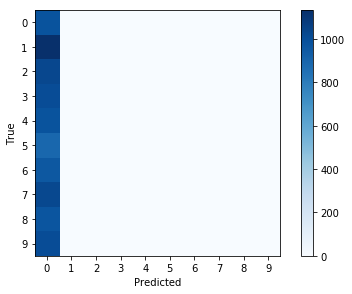

Missclassified Examples:


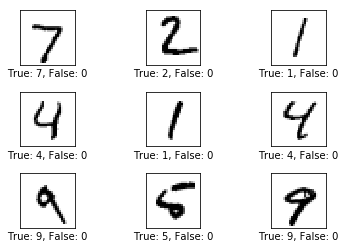

Weights:


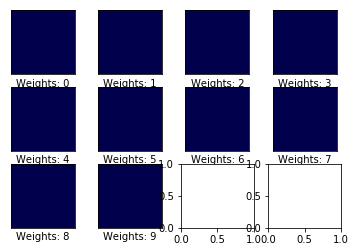


Done(*_*)


In [22]:
## Run everything here

## initial model without training
print("Optimizing...")
optimize(num_iterations=0)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)

Optimizing...
Accuracy: accuracy is : 0.8
Confusion Matrx:
[[ 945    0    1    0    0    5    3    1   24    1]
 [   0 1026    2    1    0    0    3    0  103    0]
 [  51   11  757    6    5    2   14   13  150   23]
 [  39    3   26  653    0   27    6   11  236    9]
 [   9    5    3    0  581    2    7    0  140  235]
 [  59    9    5   39    2  432    5    3  323   15]
 [  87    3   21    0   19   17  743    0   68    0]
 [  20   28   20    0    4    0    1  788   72   95]
 [   8    2    1    6    3    3    0    6  939    6]
 [  21    3    4    4    4    4    0   20  108  841]]


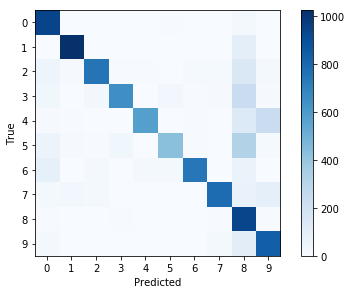

Missclassified Examples:


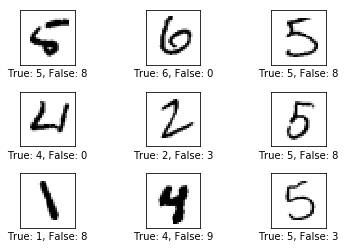

Weights:


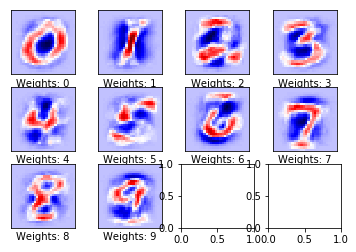


Done(*_*)


In [23]:
## model performance after train 10 iteration

print("Optimizing...")
optimize(num_iterations=9)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)

Optimizing...
Accuracy: accuracy is : 0.9
Confusion Matrx:
[[ 962    0    1    1    0    3   10    1    2    0]
 [   0 1106    2    2    0    2    4    2   17    0]
 [  13    7  891   18    9    1   18   15   51    9]
 [   4    1   11  918    0   30    4   10   24    8]
 [   1    1    3    1  898    2   17    2   12   45]
 [  10    5    2   36    7  777   16    6   27    6]
 [  11    3    2    2    9   16  912    1    2    0]
 [   4   13   19    8    5    0    0  944    4   31]
 [   6    6    4   13    9   32   10    9  880    5]
 [  11    5    1    9   24   10    1   24   11  913]]


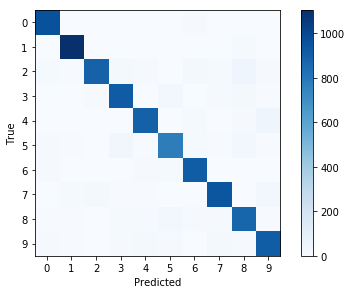

Missclassified Examples:


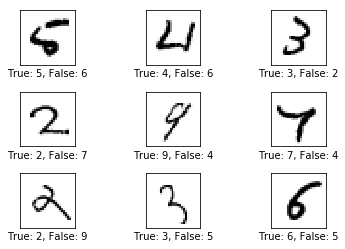

Weights:


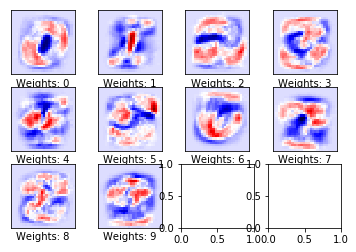


Done(*_*)


In [24]:
## model performance after train 1000 iteration
print("Optimizing...")
optimize(num_iterations=990)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)

Optimizing...
Accuracy: accuracy is : 0.9
Confusion Matrx:
[[ 960    0    1    3    0    8    5    2    1    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   5    9  920   16   10    3   14   11   37    7]
 [   3    1   17  928    1   18    2   11   19   10]
 [   1    3    4    3  919    0    9    3    6   34]
 [  10    2    5   46   11  761   14    4   28   11]
 [   9    3    4    2    9   12  914    3    2    0]
 [   1   11   20    8    9    1    0  926    1   51]
 [   9   12    6   28    9   22   10    5  857   16]
 [  10    8    1    9   23    4    0   11    5  938]]


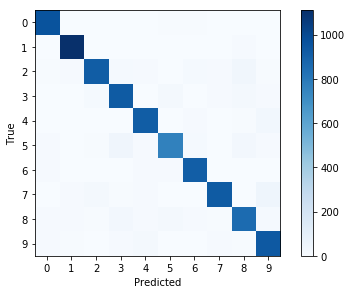

Missclassified Examples:


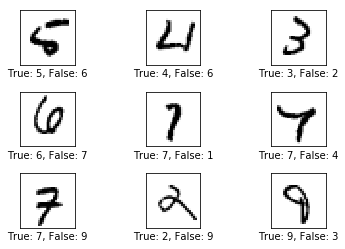

Weights:


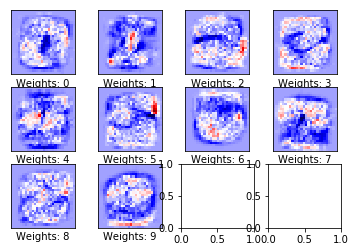


Done(*_*)


In [25]:
## model performance after train 10000 iteration

print("Optimizing...")
optimize(num_iterations=9000)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)

Optimizing...
Accuracy: accuracy is : 0.9
Confusion Matrx:
[[ 961    0    0    3    1    9    2    3    1    0]
 [   0 1114    3    1    0    1    3    1   12    0]
 [  10   14  895   18    9    5   13   13   52    3]
 [   4    1   13  902    2   39    1   10   30    8]
 [   1    3    8    3  910    0    6    6    8   37]
 [   9    2    2   32    7  786   10    5   34    5]
 [  10    3    5    3    7   31  894    2    3    0]
 [   2   10   14   10    5    1    0  950    4   32]
 [  10    9    4   13    6   26    6    8  880   12]
 [   8    7    0    9   21    7    0   22   13  922]]


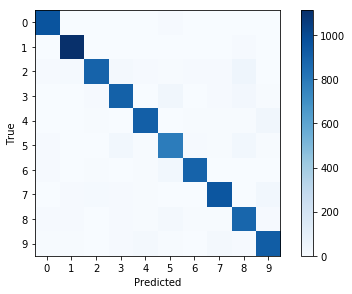

Missclassified Examples:


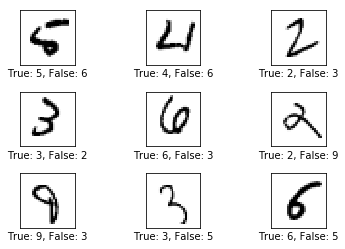

Weights:


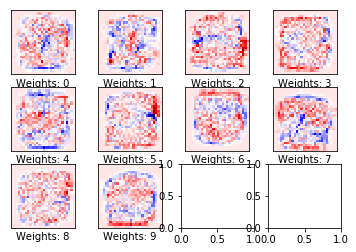


Done(*_*)


In [26]:
## model performance after train 50000 iteration

print("Optimizing...")
optimize(num_iterations=40000)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)


Done(*_*)
Optimizing...
Accuracy: accuracy is : 0.9
Confusion Matrx:
[[ 954    0    1    4    1   10    4    4    2    0]
 [   0 1114    4    1    0    1    3    2   10    0]
 [   6   10  913   20    8    3   14   11   44    3]
 [   4    1   14  923    2   21    1   11   27    6]
 [   1    3    5    3  927    0    7    6    8   22]
 [   9    3    3   40   10  762   15   10   35    5]
 [   8    3    5    3    6   14  915    2    2    0]
 [   1    8   21    8    5    1    0  957    4   23]
 [   9   12    6   21    9   17   10    9  875    6]
 [   9    7    0   11   34    5    0   30   12  901]]


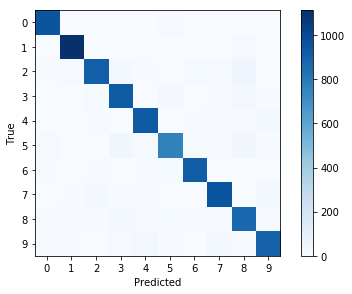

Missclassified Examples:


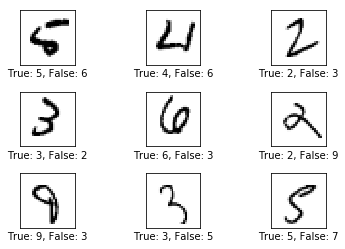

Weights:


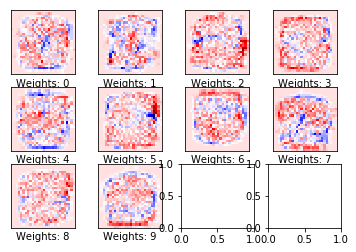


Done(*_*)


In [27]:
## modifying optimize
def optimize2(num_iterations):
    for i in range(num_iterations):
        nt = int(len(data.train.images)/batch_size)
        for _ in range(nt):
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            feed_dict_batch = {x:x_batch ,y_true:y_true_batch}

            sess.run(optimizer,feed_dict=feed_dict_batch)
        
print(s)




print("Optimizing...")
optimize2(num_iterations=10)
print("Accuracy:",end=" ")
print_accuracy()
print("Confusion Matrx:")
print_confusion_matrix()
print("Missclassified Examples:")
plot_examples_errors()
print("Weights:")
plot_weights()

print(s)

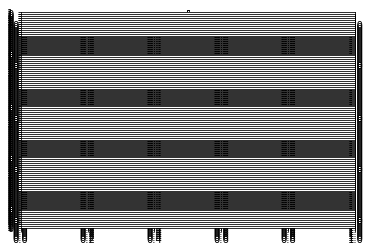

In [28]:
## Testing
fig, axes = plt.subplots(111)
axes.flat[0].imshow(data.train.images[1].reshape(img_shape),cmap='binary')
#axes[0].imshow(data.train.images[4].reshape(img_shape),cmap='binary')
axes.flat[0].set_yticks([])
axes.flat[0].set_xticks([])
plt.show()

In [29]:
print(tf.reduce_mean([[1,2,3],[10,11,12]]))

Tensor("Mean_2:0", shape=(), dtype=int32)


In [30]:
import tensorflow as tf
my_graph = tf.Graph()
with tf.Session(graph=my_graph) as sess:
    y = tf.reduce_mean([[1.,2.,3.],[10.,11.,12.]])
    print(sess.run(fetches=y))
    

6.5


In [31]:
print(type(data.train))

<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


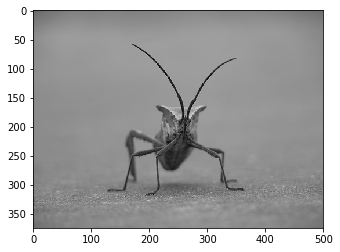

In [32]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("stinkbug.png")
plt.imshow(img)
plt.show()